In [ ]:
!pip install chatterbot==1.2.2
!pip install chatterbot_corpus


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.5/240.5 kB 9.0 MB/s eta 0:00:00


In [ ]:
from chatterbot import ChatBot
from chatterbot.trainers import ListTrainer

bot = ChatBot(
    "HealthBot",
    logic_adapters=[
        {
            'import_path': 'chatterbot.logic.BestMatch'
        }
    ]
)

trainer = ListTrainer(bot)


In [ ]:
conversation = [
    "Hello",
    "Hello! I'm your virtual health assistant. How can I help you today?",

    "What is a fever?",
    "A fever is a temporary increase in body temperature, usually due to an illness. It’s part of the body’s immune response.",

    "How do I know if I have COVID?",
    "If you have symptoms like fever, cough, fatigue, or loss of smell, it's best to get tested for COVID-19 and isolate until you get your results.",

    "What is the normal body temperature?",
    "For most people, normal body temperature is around 98.6°F or 37°C. However, it can slightly vary throughout the day.",

    "What should I do if I have a sore throat?",
    "Rest your voice, stay hydrated, and try warm salt water gargles. If symptoms persist beyond a few days, consult a doctor.",

    "Can I take paracetamol and ibuprofen together?",
    "Yes, you can alternate paracetamol and ibuprofen for better pain control, but be careful not to exceed recommended doses.",

    "What are flu symptoms?",
    "Flu symptoms include fever, chills, cough, sore throat, body aches, fatigue, and sometimes nausea or diarrhea.",

    "Should I be worried about a cough?",
    "A mild cough can be due to a cold or allergies. If it lasts over a week, gets worse, or comes with breathing trouble, see a doctor.",

    "What can I eat when I’m sick?",
    "Eat light, warm meals like soup or toast. Stay hydrated with water or herbal teas. Avoid caffeine and greasy foods.",

    "Thank you",
    "You're welcome! Stay healthy and feel free to ask me anything else."
]

trainer.train(conversation)


List Trainer: 20it [00:00, 100.39it/s]


In [ ]:
# Chat loop for conversation
print("Start chatting with HealthBot! Type 'exit' to stop.\n")

while True:
    user_input = input("You: ")
    if user_input.lower() == 'exit':
        print("HealthBot: Take care! Goodbye 👋")
        break
    response = bot.get_response(user_input)
    print("HealthBot:", response)


Start chatting with HealthBot! Type 'exit' to stop.

You: Hi
HealthBot: Should I be worried about a cough?
You: Hello
HealthBot: Hello! I'm your virtual health assistant. How can I help you today?


In [ ]:
import time

# Define test set: input and expected output
test_cases = [
    ("Hello", "Hello! I'm your virtual health assistant. How can I help you today?"),
    ("What is a fever?", "A fever is a temporary increase in body temperature, usually due to an illness. It’s part of the body’s immune response."),
    ("Can I take paracetamol and ibuprofen together?", "Yes, you can alternate paracetamol and ibuprofen for better pain control, but be careful not to exceed recommended doses."),
    ("What are flu symptoms?", "Flu symptoms include fever, chills, cough, sore throat, body aches, fatigue, and sometimes nausea or diarrhea."),
    ("What is the capital of France?", None),  # Expected to fall back
]

correct = 0
fallbacks = 0
total_time = 0
total = len(test_cases)

for i, (user_input, expected_response) in enumerate(test_cases):
    start = time.time()
    response = bot.get_response(user_input)
    elapsed = time.time() - start
    total_time += elapsed

    print(f"Q{i+1}: {user_input}")
    print(f"Bot: {response}")

    if expected_response:
        if expected_response.lower() in str(response).lower():
            correct += 1
            print("✅ Match")
        else:
            print("❌ Mismatch")
    else:
        if response.confidence < 0.5:
            fallback = True
            print("⚠️ Fallback detected")
            fallbacks += 1
        else:
            print("❌ Unexpected confident response")
    print("------")

# Summary metrics
accuracy = correct / total * 100
fallback_rate = fallbacks / total * 100
avg_response_time = total_time / total

print(f"\nEvaluation Summary:")
print(f"Accuracy: {accuracy:.2f}%")
print(f"Fallback Rate: {fallback_rate:.2f}%")
print(f"Average Response Time: {avg_response_time:.4f} seconds")


Q1: Hello
Bot: Hello
❌ Mismatch
------
Q2: What is a fever?
Bot: Hello
❌ Mismatch
------
Q3: Can I take paracetamol and ibuprofen together?
Bot: Hello
❌ Mismatch
------
Q4: What are flu symptoms?
Bot: Hello
❌ Mismatch
------
Q5: What is the capital of France?
Bot: Hello
⚠️ Fallback detected
------

Evaluation Summary:
Accuracy: 0.00%
Fallback Rate: 20.00%
Average Response Time: 0.0430 seconds


Precision: 0.00
Recall: 0.00
F1 Score: 0.00


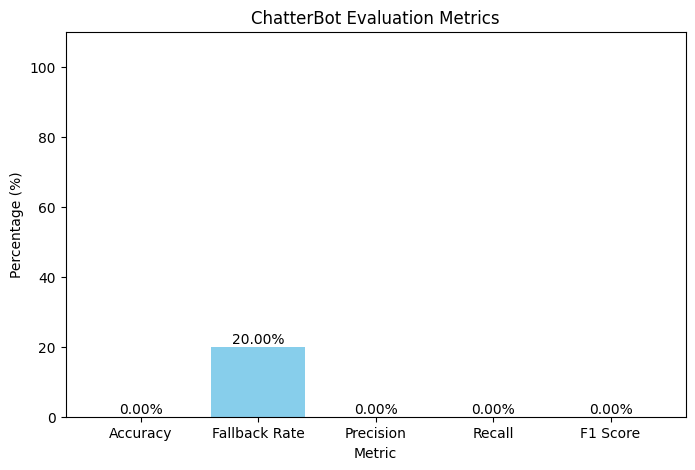

In [ ]:
import matplotlib.pyplot as plt

# Calculating Precision, Recall, and F1 Score
def calculate_precision_recall_f1(correct, total, fallbacks):
    precision = correct / (correct + fallbacks) if (correct + fallbacks) > 0 else 0
    recall = correct / total if total > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    return precision, recall, f1

# Calculate metrics
precision, recall, f1 = calculate_precision_recall_f1(correct, total, fallbacks)

# Print the calculated metrics
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Prepare data for graph
metrics = ['Accuracy', 'Fallback Rate', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, fallback_rate, precision * 100, recall * 100, f1 * 100]

# Plotting the metrics
plt.figure(figsize=(8, 5))
plt.bar(metrics, values, color='skyblue')
plt.title('ChatterBot Evaluation Metrics')
plt.xlabel('Metric')
plt.ylabel('Percentage (%)')
for i, v in enumerate(values):
    plt.text(i, v + 1, f"{v:.2f}%", ha='center')
plt.ylim(0, 110)
plt.show()
